# ***Predict Test Scores of students***

**Step 1:** Import Necessary **Libraries**

In [65]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Step 2:** Load the **Dataset**

In [67]:
df=pd.read_csv("test_scores.csv")
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


**Step 3:** Explore the **Dataset**

In [68]:
# Check for missing values
print(df.isnull().sum())
# Get basic statistics
print(df.describe())

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64
         n_student      pretest     posttest
count  2133.000000  2133.000000  2133.000000
mean     22.796531    54.955931    67.102203
std       4.228893    13.563101    13.986789
min      14.000000    22.000000    32.000000
25%      20.000000    44.000000    56.000000
50%      22.000000    56.000000    68.000000
75%      27.000000    65.000000    77.000000
max      31.000000    93.000000   100.000000


**Step 4:** Data Cleaning

In [69]:
#remove unused Columns
df=df.drop(['school','classroom','student_id'],axis='columns')
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


**Step 5:** Preprocess the Data

In [70]:
# Convert categorical variables to numerical (One-Hot Encoding)
dataset=pd.get_dummies(df,drop_first=True)
for col in dataset:
    if dataset[col].dtypes=='bool':
        dataset[col].replace({True:1,False:0},inplace=True)

for col in dataset:
      print(f'{col} : {dataset[col].unique()}')
dataset.head()

n_student : [20. 21. 18. 15. 16. 19. 17. 28. 27. 24. 14. 22. 23. 31. 25. 26. 29. 30.]
pretest : [62. 66. 64. 61. 63. 60. 67. 57. 56. 58. 54. 59. 65. 55. 68. 73. 70. 74.
 76. 69. 75. 78. 72. 71. 49. 53. 48. 52. 50. 46. 44. 51. 47. 43. 37. 40.
 39. 41. 38. 45. 36. 42. 31. 35. 33. 27. 30. 34. 32. 29. 28. 23. 26. 77.
 79. 82. 80. 85. 83. 84. 86. 89. 93. 88. 81. 87. 91. 22. 25.]
posttest : [ 72.  79.  76.  77.  74.  75.  73.  78.  71.  70.  68.  66.  65.  67.
  63.  69.  82.  87.  80.  83.  81.  84.  85.  91.  86.  64.  88.  61.
  62.  58.  57.  59.  56.  60.  55.  54.  49.  53.  52.  50.  51.  48.
  39.  43.  45.  47.  42.  44.  46.  41.  36.  40.  32.  38.  35.  34.
  93.  90.  92.  97.  95.  99.  89.  94.  96.  98. 100.  37.]
school_setting_Suburban : [0 1]
school_setting_Urban : [1 0]
school_type_Public : [0 1]
teaching_method_Standard : [1 0]
gender_Male : [0 1]
lunch_Qualifies for reduced/free lunch : [0 1]


,n_student,pretest,posttest,school_setting_Suburban,school_setting_Urban,school_type_Public,teaching_method_Standard,gender_Male,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,72.0,0,1,0,1,0,0
1,20.0,66.0,79.0,0,1,0,1,0,0
2,20.0,64.0,76.0,0,1,0,1,1,0
3,20.0,61.0,77.0,0,1,0,1,0,0
4,20.0,64.0,76.0,0,1,0,1,1,0


**Step 6:** Define Features (X) and Target (y)

In [71]:
# Define X (features) and y (target)
X = dataset.drop('posttest',axis='columns')
y = dataset['posttest']

**Step 7:** Split the Dataset

In [72]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


**Step 8:** Choose a Machine Learning Model

In [73]:
# Initialize the Linear Regression model
lr_model = LinearRegression()
# Train the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

**Step 9:** Evaluate the Model

In [74]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Model - MSE: {mse}, R-squared: {r2}")

Linear Regression Model - MSE: 10.020350228685526, R-squared: 0.9515806736585357


In [75]:
lr_model.score(X_test,y_test)

0.9515806736585357

**Step 10:** Try Another Model **(Random Forest Regressor)**

In [76]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=40)
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Model - MSE: {mse_rf}, R-squared: {r2_rf}")

Random Forest Model - MSE: 10.595289905972388, R-squared: 0.9488025081028534


**Step 11:** Visualize Model Performance

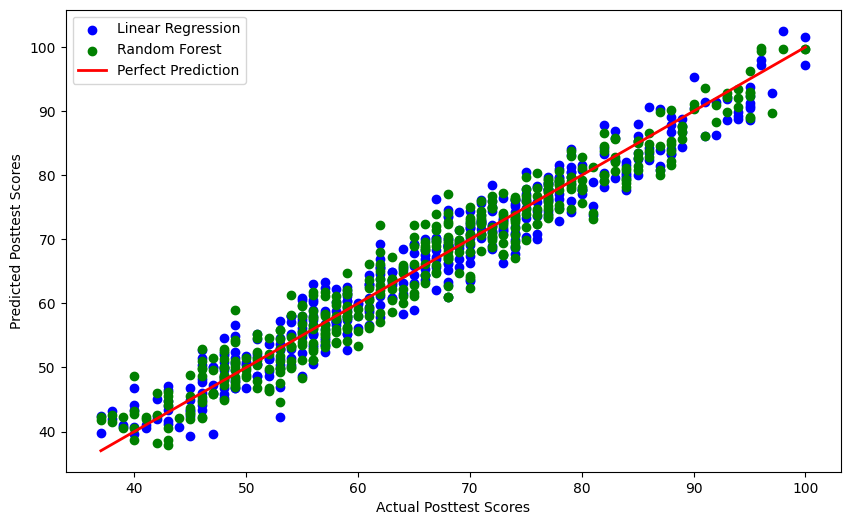

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Posttest Scores')
plt.ylabel('Predicted Posttest Scores')
plt.legend()
plt.show()


**Step 12:** Make Predictions on New Data

In [78]:
# Example: new student data (make sure it's in the same format as X_test)
new_data = np.array([[21,71,0,1,0,1,0,0]])

# Predict the posttest score
predicted_score = rf_model.predict(new_data)
print(f"Predicted Posttest Score: {predicted_score}")


Predicted Posttest Score: [79.87533333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [80]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    print("\n")


In [81]:
# Evaluate Linear Regression Model
evaluate_model(y_test, y_pred, "Linear Regression")

# Evaluate Random Forest Model
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Linear Regression Performance ---
Mean Squared Error (MSE): 10.020350228685526
Mean Absolute Error (MAE): 2.5527201343107317
R-squared (R²): 0.9515806736585357


--- Random Forest Performance ---
Mean Squared Error (MSE): 10.595289905972388
Mean Absolute Error (MAE): 2.61856766145642
R-squared (R²): 0.9488025081028534




In [82]:
# Create a dataframe for the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_rf)],
    'Mean Absolute Error': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_rf)],
    'R-squared (R²)': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_rf)]
})

# Display the results
print(results)


               Model  Mean Squared Error  Mean Absolute Error  R-squared (R²)
0  Linear Regression            10.02035             2.552720        0.951581
1      Random Forest            10.59529             2.618568        0.948803


# **Confusion Matrix**

In [84]:
from sklearn.metrics import confusion_matrix
# Convert predictions to discrete values (e.g., by rounding)
y_pred_discrete = np.round(y_pred)  # Example: Round to nearest integer
# Calculate confusion matrix with discrete predictions
cm = confusion_matrix(y_test, y_pred_discrete)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(95.72222222222221, 0.5, 'Truth')

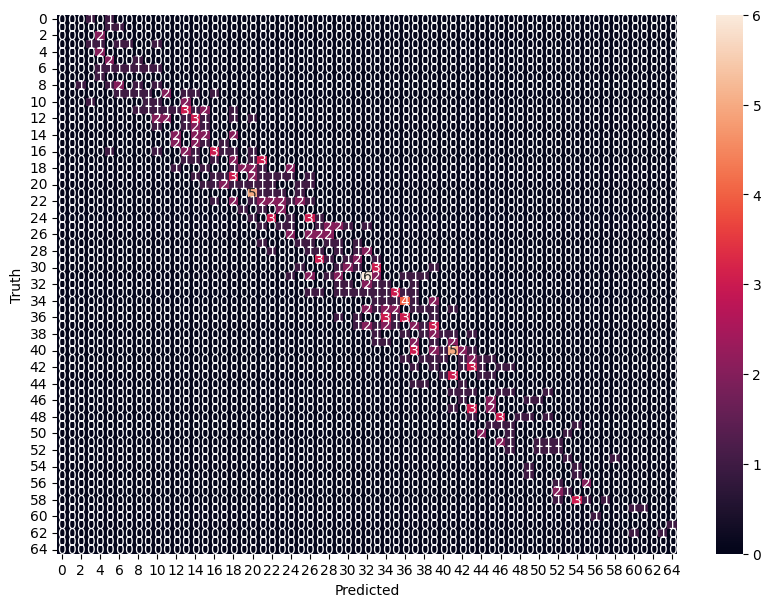

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')